In [362]:
import os
import pandas as pd
telco_raw=pd.read_csv('telco_raw.csv', skipinitialspace=True)
telco_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [363]:
telco_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [364]:
telco_raw.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [365]:
telco_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [366]:
custid = ['customerID']
target = ['Churn']

In [367]:
categorical = telco_raw.nunique()[telco_raw.nunique()<10].keys().tolist()
categorical.remove(target[0])
numerical = [col for col in telco_raw.columns if col not in custid+target+categorical]

In [368]:
telco_raw = pd.get_dummies(data=telco_raw, columns=categorical, drop_first=True)


In [369]:
# Import StandardScaler library
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler instance
scaler = StandardScaler()

In [370]:
# Fit the scaler to numerical columns
scaled_numerical = scaler.fit_transform(telco_raw[numerical])

In [371]:
# Build a DataFrame
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [372]:
# Drop non-scaled numerical columns
telco_raw = telco_raw.drop(columns=numerical, axis=1)

In [373]:
# Merge the non-numerical with the scaled numerical data
telco = telco_raw.merge(right=scaled_numerical,
how='left',
left_index=True,
right_index=True
)

In [374]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [375]:
cols    = [col for col in telco_raw.columns if col not in custid+target]

In [376]:
cols

['gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [377]:
X = telco_raw[cols]
Y = telco_raw['Churn']

In [378]:
# 1. Split data to training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25)

In [379]:
# 2. Initialize the model
mytree = tree.DecisionTreeClassifier(max_depth=5)

In [380]:
# 3. Fit the model on the training data
treemodel = mytree.fit(train_X, train_Y)

In [381]:
# 4. Predict values on the testing data
pred_Y = treemodel.predict(test_X)

In [382]:
# 5. Measure model performance on testing data
accuracy_score(test_Y, pred_Y)

0.7705848949460534

In [320]:
# Initialize the Decision Tree
clf = tree.DecisionTreeClassifier(max_depth = 7, 
               criterion = 'gini', 
               splitter  = 'best')

# Fit the model to the training data
clf = clf.fit(train_X, train_Y)

# Predict the values on test dataset
pred_Y = clf.predict(test_X)

In [321]:
import numpy as np
# Print accuracy values
print("Training accuracy: ", np.round(clf.score(train_X, train_Y), 3)) 
print("Test accuracy: ", np.round(accuracy_score(test_Y, pred_Y), 3))

Training accuracy:  0.791
Test accuracy:  0.78


In [322]:
telco.groupby(['Churn']).size()/telco.shape[0]*100

Churn
No     73.463013
Yes    26.536987
dtype: float64

In [323]:
telco["Churn"].replace({"No": 0, "Yes": 1}, inplace=True)


### Predicting Churn with Logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_X,train_Y)
pred_train_y=logreg.predict(train_X)
pred_test_y=logreg.predict(test_X)
train_accuracy=accuracy_score(train_Y,pred_train_y)
test_accuracy=accuracy_score(test_Y,pred_test_y)
print('Training accuracy:', round(train_accuracy,4))
print('Testing accuracy:', round(test_accuracy,4))

Training accuracy: 0.7891
Testing accuracy: 0.7842


In [246]:
# Measuring precision and recall
from sklearn.metrics import precision_score, recall_score
train_precision=round(precision_score(train_Y,pred_train_y),4)
test_precision=round(precision_score(test_Y,pred_test_y),4)
train_recall=round(recall_score(train_Y,pred_train_y),4)
test_recall=round(recall_score(test_Y,pred_test_y),4)
print('Training precision: {}, Training recall: {}'.format(train_precision,train_recall))
print('Testing precision: {}, Testing recall: {}'.format(test_precision,test_recall))


Training precision: 0.6279, Training recall: 0.5167
Testing precision: 0.6043, Testing recall: 0.4934


### L1 regularization and feature selection

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
logreg.fit(train_X,test_Y)


In [249]:
C=[1,.5,.25,.1,.05,.025,.01,.005,.0025]
l1_metrices=np.zeros((len(C),5))
# add C cantidates in the first column
l1_metrices[:,0]=C

In [250]:
l1_metrices

array([[1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.5   , 0.    , 0.    , 0.    , 0.    ],
       [0.25  , 0.    , 0.    , 0.    , 0.    ],
       [0.1   , 0.    , 0.    , 0.    , 0.    ],
       [0.05  , 0.    , 0.    , 0.    , 0.    ],
       [0.025 , 0.    , 0.    , 0.    , 0.    ],
       [0.01  , 0.    , 0.    , 0.    , 0.    ],
       [0.005 , 0.    , 0.    , 0.    , 0.    ],
       [0.0025, 0.    , 0.    , 0.    , 0.    ]])

In [256]:
for index in range (0, len(C)):
    logreg=LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(train_X,train_Y)
    pred_test_Y=logreg.predict(test_X)
    l1_metrices[index,1]=np.count_nonzero(logreg.coef_)
    l1_metrices[index,2]=accuracy_score(test_Y,pred_test_Y)
    l1_metrices[index,3]=precision_score(test_Y,pred_test_Y)
    l1_metrices[index,4]=recall_score(test_Y,pred_test_Y)
col_names=['C','Non-ZeroCoeffs','Accuracy','Precision','Recall']
print(pd.DataFrame(l1_metrices, columns=col_names))
    

        C  Non-ZeroCoeffs  Accuracy  Precision    Recall
0  1.0000            24.0  0.784214   0.603723  0.495633
1  0.5000            24.0  0.785349   0.606952  0.495633
2  0.2500            26.0  0.784214   0.604839  0.491266
3  0.1000            20.0  0.786485   0.611413  0.491266
4  0.0500            20.0  0.789892   0.628655  0.469432
5  0.0250            15.0  0.797842   0.664516  0.449782
6  0.0100            11.0  0.771153   0.687075  0.220524
7  0.0050             6.0  0.739920   0.000000  0.000000
8  0.0025             0.0  0.739920   0.000000  0.000000


C:\Users\Hp\Anaconda3\anac3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\Anaconda3\anac3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTreeClassifier

In [257]:
from sklearn.tree import DecisionTreeClassifier
mytree=DecisionTreeClassifier()
treemodel=mytree.fit(train_X,train_Y)
pred_train_Y=mytree.predict(train_X)
pred_test_Y=mytree.predict(test_X)
train_accuracy=accuracy_score(train_Y,pred_train_Y)
test_accuracy=accuracy_score(test_Y,pred_test_Y)
print('Training accuracy:', round(train_accuracy,4))
print('Testing accuracy:', round(test_accuracy,4))


Training accuracy: 0.9241
Testing accuracy: 0.7183


In [260]:
train_precision=round(precision_score(train_Y,pred_train_Y),4)
test_precision=round(precision_score(test_Y,pred_test_Y),4)
train_recall=round(recall_score(train_Y,pred_train_Y),4)
test_recall=round(recall_score(test_Y,pred_test_Y),4)
print('Training precision: {}, Training recall: {}'.format(train_precision,train_recall))
print('Testing precision: {}, Testing recall: {}'.format(test_precision,test_recall))

Training precision: 0.9079, Training recall: 0.7966
Testing precision: 0.4568, Testing recall: 0.4389


In [263]:
depth_list=list(range(2,15))
depth_tuning=np.zeros((len(depth_list),4))
depth_tuning[:,0]=depth_list

In [265]:
depth_tuning

array([[ 2.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  0.],
       [ 8.,  0.,  0.,  0.],
       [ 9.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.],
       [11.,  0.,  0.,  0.],
       [12.,  0.,  0.,  0.],
       [13.,  0.,  0.,  0.],
       [14.,  0.,  0.,  0.]])

In [266]:
for index in range(len(depth_list)):
    mytree=DecisionTreeClassifier(max_depth=depth_list[index])
    mytree.fit(train_X,train_Y)
    pred_test_Y=mytree.predict(test_X)
    depth_tuning[index,1]=accuracy_score(test_Y,pred_test_Y)
    depth_tuning[index,2]=precision_score(test_Y,pred_test_Y)
    depth_tuning[index,3]=recall_score(test_Y,pred_test_Y)
col_names=['Max_Depth','Accuracy','Precision','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))
    

C:\Users\Hp\Anaconda3\anac3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Max_Depth  Accuracy  Precision    Recall
0         2.0  0.739920   0.000000  0.000000
1         3.0  0.778535   0.566148  0.635371
2         4.0  0.786485   0.595349  0.558952
3         5.0  0.787053   0.646643  0.399563
4         6.0  0.779103   0.593496  0.478166
5         7.0  0.770585   0.574586  0.454148
6         8.0  0.779103   0.583535  0.526201
7         9.0  0.757524   0.533769  0.534934
8        10.0  0.764338   0.542744  0.596070
9        11.0  0.758660   0.533469  0.574236
10       12.0  0.745031   0.509434  0.530568
11       13.0  0.736513   0.493478  0.495633
12       14.0  0.731970   0.484716  0.484716


### Identify and interpret churn drivers

In [ ]:
cols    = [col for col in telco.columns if col not in custid+target]

In [409]:
cols ### drop numerical values'ten sonra numeric değerler kaybolmuştu, yeniden içeri al. telco.columns telco_raw.columns değil.
# sonrasında sana totalcharges'deki NaN değerler için hata verecek, bunu aşağıdaki kod ile düzeltmelisin.

['gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
telco.dropna(subset=['TotalCharges'], inplace=True) 

In [ ]:
X = telco[cols]
Y = telco['Churn']

In [ ]:
telco.info()

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25)

In [408]:
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(train_X.columns, columns=['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns=['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

                                  Feature  Coefficient  Exp_Coefficient
27                                 tenure    -1.524721         0.217682
22                      Contract_Two year    -1.229935         0.292312
21                      Contract_One year    -0.563382         0.569281
10                     OnlineSecurity_Yes    -0.440100         0.643972
16                        TechSupport_Yes    -0.384370         0.680880
4                        PhoneService_Yes    -0.317368         0.728063
3                          Dependents_Yes    -0.157058         0.854654
12                       OnlineBackup_Yes    -0.147552         0.862818
9      OnlineSecurity_No internet service    -0.105173         0.900169
17        StreamingTV_No internet service    -0.105173         0.900169
15        TechSupport_No internet service    -0.105173         0.900169
13   DeviceProtection_No internet service    -0.105173         0.900169
19    StreamingMovies_No internet service    -0.105173         0

In [407]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_X,train_Y)
pred_train_y=logreg.predict(train_X)
pred_test_y=logreg.predict(test_X)
train_accuracy=accuracy_score(train_Y,pred_train_y)
test_accuracy=accuracy_score(test_Y,pred_test_y)
print('Training accuracy:', round(train_accuracy,4))
print('Testing accuracy:', round(test_accuracy,4))

Training accuracy: 0.8074
Testing accuracy: 0.806


## REVENUE-BASED CUSTOMER LIFETIME VALUE (CLV) BASICS

### Cohort Analysis

In [1]:
import pandas as pd
# We'll work with online retail dataset
df=pd.read_excel('OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.sample(n = 20000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
328349,565767,22728,ALARM CLOCK BAKELIKE PINK,5,2011-09-06 14:28:00,8.29,NaN,United Kingdom
448295,575046,20668,DISCO BALL CHRISTMAS DECORATION,48,2011-11-08 12:09:00,0.12,15039.0,United Kingdom
445551,574852,22362,GLASS JAR PEACOCK BATH SALTS,1,2011-11-07 12:04:00,2.95,15493.0,United Kingdom
175209,551891,22998,TRAVEL CARD WALLET KEEP CALM,24,2011-05-05 09:53:00,0.42,17429.0,United Kingdom
277087,561091,21172,PARTY METAL SIGN,1,2011-07-25 09:55:00,4.13,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
4502,536785,84946,ANTIQUE SILVER TEA GLASS ETCHED,216,2010-12-02 15:22:00,1.06,15061.0,United Kingdom
30067,538844,22198,LARGE POPCORN HOLDER,13,2010-12-14 13:19:00,1.65,14680.0,United Kingdom
326573,565565,22128,PARTY CONES CANDY ASSORTED,12,2011-09-05 12:20:00,1.25,14534.0,United Kingdom
62542,541506,72807a,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2011-01-18 16:05:00,8.29,NaN,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
import datetime as dt
def get_month(x) : return dt.datetime(x.year,x.month,1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [5]:
def get_date_int(df, column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day

In [6]:
invoice_year, invoice_month, _=get_date_int(df,'InvoiceMonth')
cohort_year, cohort_month,_=get_date_int(df,'CohortMonth')

In [7]:
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month

In [8]:
df['CohortIndex']=years_diff*12+months_diff+1

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [11]:
### Calculate monthyl active customers in each cohort
group=df.groupby(['CohortMonth','CohortIndex'])

In [12]:
cohort_data=group['CustomerID'].apply(pd.Series.nunique)

In [13]:
cohort_data=cohort_data.reset_index()

In [14]:
cohort_counts=cohort_data.pivot(index='CohortMonth',
                               columns='CohortIndex',
                               values='CustomerID')

In [32]:
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cohort_sizes

CohortMonth
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1.0, dtype: float64

In [22]:
# Extract cohort sizes from the first column of cohort_counts
cohort_sizes = cohort_counts.iloc[:,0]

# Calculate retention table by dividing the counts with the cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Calculate churn table
churn = 1 - retention

# Print the retention table
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
churn

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,0.0,0.618143,0.665612,0.612869,0.640295,0.603376,0.620253,0.645570,0.645570,0.605485,0.626582,0.500000,0.725738
2011-01-01,0.0,0.760095,0.717340,0.757720,0.672209,0.700713,0.738717,0.743468,0.688836,0.653207,0.631829,0.850356,NaN
2011-02-01,0.0,0.752632,0.807895,0.721053,0.731579,0.752632,0.744737,0.718421,0.742105,0.686842,0.907895,NaN,NaN
2011-03-01,0.0,0.809091,0.745455,0.781818,0.768182,0.822727,0.736364,0.761364,0.711364,0.911364,NaN,NaN,NaN
2011-04-01,0.0,0.772575,0.779264,0.789298,0.792642,0.762542,0.769231,0.739130,0.916388,NaN,NaN,NaN,NaN
2011-05-01,0.0,0.763441,0.827957,0.827957,0.784946,0.756272,0.734767,0.896057,NaN,NaN,NaN,NaN,NaN
2011-06-01,0.0,0.791489,0.812766,0.727660,0.753191,0.663830,0.897872,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,0.0,0.790576,0.795812,0.769634,0.727749,0.884817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.0,0.748503,0.748503,0.748503,0.862275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.26; Churn rate: 0.74


In [25]:
retention.iloc[:,1:]

CohortIndex,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,
2010-12-01,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df['TotalSum'] = df['UnitPrice']* df['Quantity']

### Basic CLV

In [64]:
# Monthly spend per customer
monthly_revenue=df.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()
# Average monthly mean
monthly_revenue=np.mean(monthly_revenue)
# Define lifespan to 36 months
lifespan_months= 36


In [66]:
clv_basic=monthly_revenue*lifespan_months
print('Average basic CLV is {:.1f} USD'.format(clv_basic))

Average basic CLV is 21850.3 USD


### Granular CLV

In [68]:
# Average revenue per invoice
revenue_per_purchase=df.groupby(['InvoiceNo'])['TotalSum'].mean().mean()
# Calculate average number of unique invoices per customer per month
freq=df.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()
lifespan_months= 36
# Granular
clv_granular=revenue_per_purchase*freq*lifespan_months

In [70]:
print('Average granular CLV is {:.1f} USD'.format(clv_granular))

Average granular CLV is 1183.6 USD


### Traditional CLV

In [27]:
# Monthly spend per customer
monthly_revenue=df.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()
retention_rate = retention.iloc[:,1:].mean().mean()
# Average monthly churn rate
churn_rate = 1 - retention_rate
# CLV traditional
clv_traditional=monthly_revenue*(retention_rate/churn_rate)

In [75]:
print('Average traditional CLV is {:.1f} USD at % {:.1f} retention_rate'.format(clv_traditional,retention_rate*100))

Average traditional CLV is 215.3 USD at % 26.2 retention_rate


In [ ]:
# It's much less than basisc and granular clv, since retention is very low and the ratio < 1

### Data Preparation for Purchase Prediction (Next Month)

In [15]:
df.groupby(['InvoiceMonth']).size()

InvoiceMonth
2010-12-01    42481
2011-01-01    35147
2011-02-01    27707
2011-03-01    36748
2011-04-01    29916
2011-05-01    37030
2011-06-01    36874
2011-07-01    39518
2011-08-01    35284
2011-09-01    50226
2011-10-01    60742
2011-11-01    84711
2011-12-01    25525
dtype: int64

In [16]:
# Exclude target variable-last period
df_x=df[df['InvoiceMonth']!='2011-12']

In [17]:
# Define snapshot date
NOW=dt.datetime(2011,12,1)

In [28]:
import numpy as np
features=df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (NOW-x.max()).days,
    'InvoiceNo':pd.Series.nunique,
    'TotalSum':np.sum,
    'Quantity':['mean','sum']
     }).reset_index()

In [131]:
features

CustomerID InvoiceDate InvoiceNo TotalSum   Quantity      
                   <lambda>   nunique      sum       mean   sum
0       12346.0         316         2     0.00   0.000000     0
1       12347.0          -7         7  4310.00  13.505495  2458
2       12348.0          66         4  1797.24  75.516129  2341
3       12349.0           9         1  1757.55   8.643836   631
4       12350.0         301         1   334.40  11.588235   197
...         ...         ...       ...      ...        ...   ...
4367    18280.0         268         1   180.60   4.500000    45
4368    18281.0         171         1    80.82   7.714286    54
4369    18282.0          -2         3   176.60   7.538462    98
4370    18283.0          -6        16  2094.88   1.847884  1397
4371    18287.0          33         3  1837.28  22.657143  1586

[4372 rows x 6 columns]

In [29]:
# Build a pivot table counting invoices for each customer monthly
cust_month_tx = pd.pivot_table(data=df, values='InvoiceNo',
                               index=['CustomerID'], columns=['InvoiceMonth'],
                               aggfunc=pd.Series.nunique, fill_value=0)



In [30]:
cust_month_tx

InvoiceMonth,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12346.0,0,2,0,0,0,0,0,0,0,0,0,0,0
12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,2,0,0,0,1


In [31]:
# Store target value as `Y`
Y = cust_month_tx['2011-12-01']

In [32]:
Y

CustomerID
12346.0    0
12347.0    1
12348.0    0
12349.0    0
12350.0    0
          ..
18280.0    0
18281.0    0
18282.0    1
18283.0    1
18287.0    0
Name: 2011-12-01 00:00:00, Length: 4372, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
# Store customer identifier column name as a list
custid = ['CustomerID']

# Select feature column names excluding customer identifier
cols = [col for col in features.columns if col not in custid]

# Extract the features as `X`
X = features[cols]

# Split data to training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=99)

In [37]:
from sklearn.linear_model import LinearRegression
# Initialize linear regression instance
linreg = LinearRegression()

# Fit the model to training dataset
linreg.fit(train_X, train_Y)

# Predict the target variable for training data
train_pred_Y = linreg.predict(train_X)

# Predict the target variable for testing data
test_pred_Y = linreg.predict(test_X)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(train_Y, train_pred_Y)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(test_Y, test_pred_Y)

# Print the performance metrics
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, mae_train, mae_test))

RMSE train: 0.4647329295930959; RMSE test: 0.46009766115362566
MAE train: 0.28701190133693527, MAE test: 0.2984571636799312


### Customer Segmentation

In [26]:
import numpy as np
import pandas as pd
df=pd.read_csv('Wholesale.csv')
df=df.drop(columns=['Channel','Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Unsupervised Learning Models
#### -   Hierarchial clustering
#### -   K-Means
#### -   Non-Negative matrix factorization
#### -   Hierarchial Clustering

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [28]:
df.agg(['mean','std']).round

<bound method DataFrame.round of              Fresh         Milk      Grocery       Frozen  Detergents_Paper  \
mean  12000.297727  5796.265909  7951.277273  3071.931818       2881.493182   
std   12647.328865  7380.377175  9503.162829  4854.673333       4767.854448   

       Delicassen  
mean  1524.870455  
std   2820.105937  >

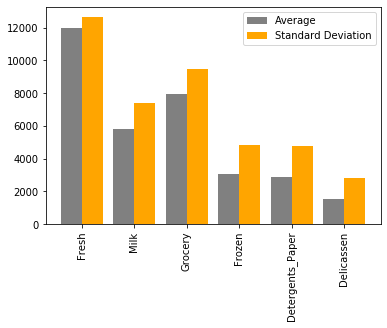

In [30]:
averages=df.mean()
st_dev=df.std()
x_names=df.columns
x_ix=np.arange(df.shape[1])
import matplotlib.pyplot as plt
plt.bar(x_ix-0.2, averages, color='grey',label='Average',width=0.4)
plt.bar(x_ix+0.2, st_dev, color='orange',label='Standard Deviation',width=0.4)
plt.xticks(x_ix, x_names, rotation=90)
plt.legend()
plt.show()

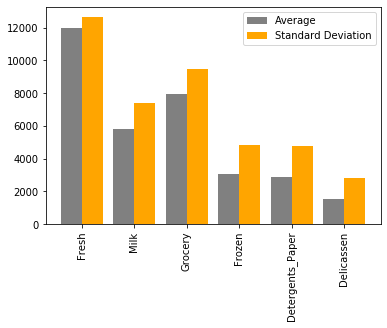

In [31]:
import matplotlib.pyplot as plt
plt.bar(x_ix-0.2, averages, color='grey',label='Average',width=0.4)
plt.bar(x_ix+0.2, st_dev, color='orange',label='Standard Deviation',width=0.4)
plt.xticks(x_ix, x_names, rotation=90)
plt.legend()
plt.show()

### Pairwise Plot with skewed data

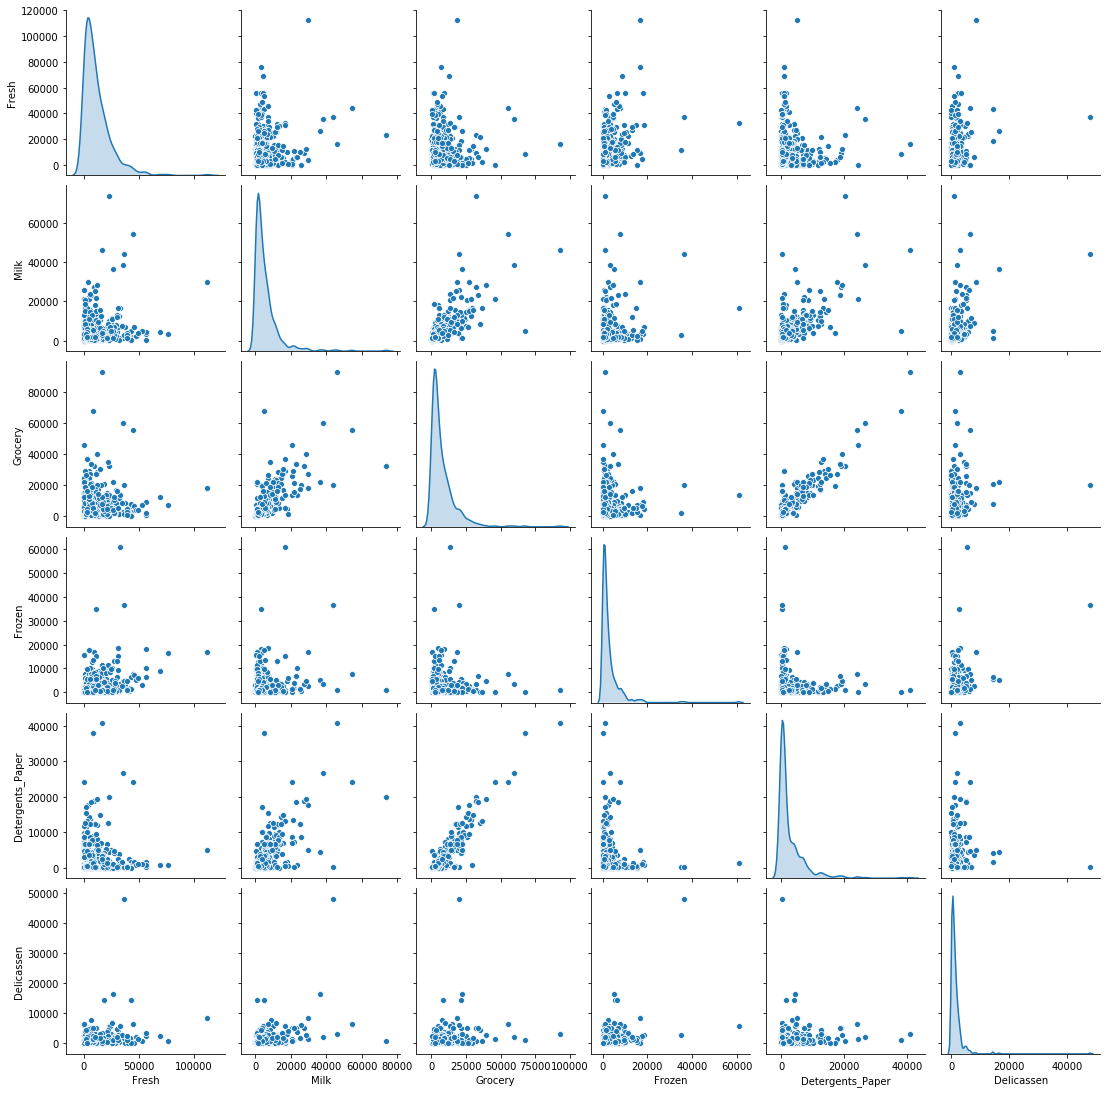

In [32]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde')
plt.show()

#### Data preparation for customer segmentation with K-Means

K-Means clustering works well when data is
1- Normally distributed (no skew)
2- Standardized (mean=0, std=1)

### Pairwise plot with unskewed data with log-transformations

In [33]:
df_log=np.log(df)

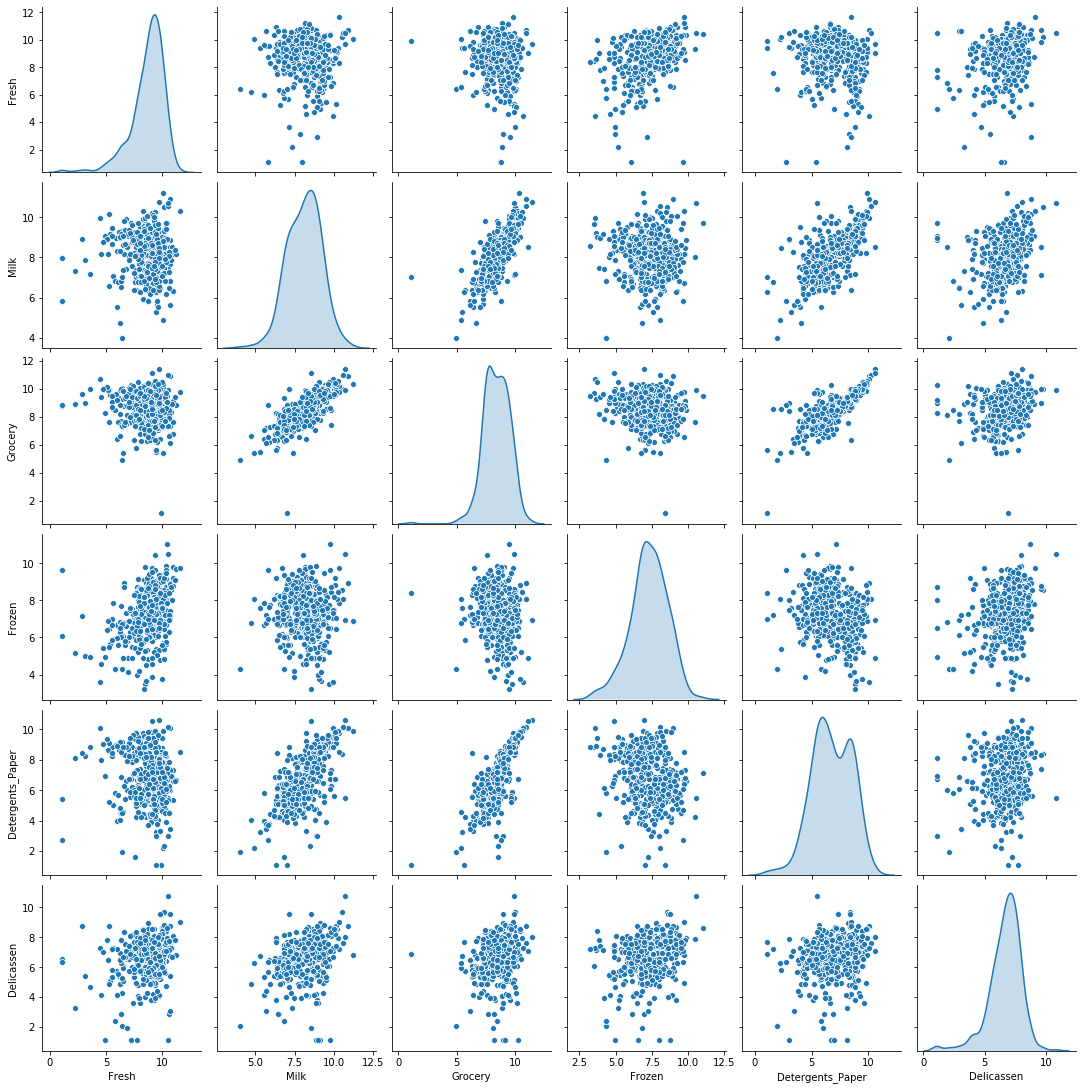

In [34]:
sns.pairplot(df_log, diag_kind='kde')
plt.show()

### Pairwise plot with unskewed data with Box-Cox


In [35]:
from scipy import stats
def box_cox(x):
    x_boxcox,_=stats.boxcox(x)
    return x_boxcox
df_boxcox=df.apply(box_cox, axis=0)

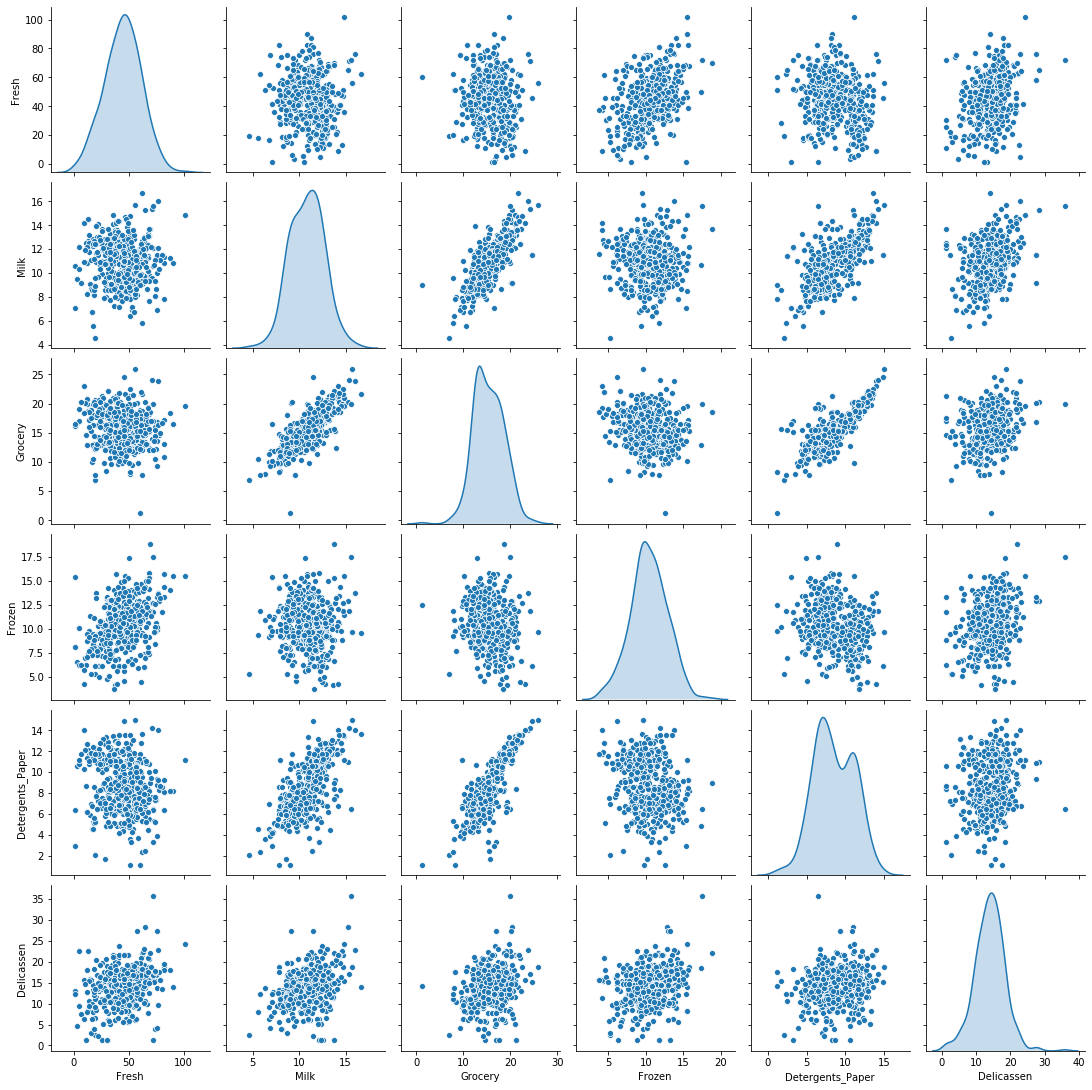

In [36]:
sns.pairplot(df_boxcox, diag_kind='kde')
plt.show()

#### Scale the data
- Substract column average from each column value. This adjust column average close to 0 (good for KMeans!).
- Divide the results by column standard deviation. This step makes column std close to 1 (good for KMeans!).

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_boxcox)
all_scaled=scaler.transform(df_boxcox)
all_scaled_df=pd.DataFrame(data=all_scaled,
                          index=df_boxcox.index,
                          columns=df_boxcox.columns)

In [38]:
all_scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.412646,0.979303,0.392937,-1.456705,0.617238,0.335779
1,-0.111180,0.995096,0.626729,0.079718,0.748629,0.599877
2,-0.196043,0.887891,0.408738,0.331996,0.790324,2.245295
3,0.457763,-0.965094,-0.156523,1.173643,-0.373844,0.606332
4,1.028704,0.412455,0.344961,0.741520,0.364211,1.738881
...,...,...,...,...,...,...
435,1.357112,1.201976,1.164326,1.839607,-0.935948,0.811050
436,1.720545,-0.808552,-1.550221,0.863813,-1.285593,0.873759
437,0.549059,1.458163,1.876742,-0.968503,1.750367,0.647978
438,0.216004,-0.519911,-0.712014,-0.333575,-0.978393,0.774734


In [39]:
all_scaled_df.agg(['mean','std']).round()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


### Building Customer & Product Segmentation with K-Means and NMF
- 

In [40]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(all_scaled_df)
wholesale_kmeans=df.assign(segment=kmeans.labels_)

In [41]:
wholesale_kmeans

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,2


In [42]:
# Import the non-negative matrix factorization module
from sklearn.decomposition import NMF

# Initialize NMF instance with 4 components
nmf = NMF(4)

# Fit the model on the wholesale sales data
nmf.fit(df)

# Extract the components 
components = pd.DataFrame(data=nmf.components_, columns=df.columns)


In [55]:
nmf_results = nmf.transform(df)
df['nmf_results'] = nmf_results.argmax(axis=1)

other method is

In [ ]:
# Create the W matrix
W = pd.DataFrame(data=nmf.transform(df), columns=components.index)
W.index = df.index

# Assign the column name where the corresponding value is the largest
wholesale_nmf4 = df.assign(segment = W.idxmax(axis=1))

# Calculate the average column values per each segment
nmf3_averages = wholesale_nmf4.groupby('segment').mean().round(0)

In [59]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,nmf_results
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


#### Elbow Criterion Method
- Run clustering for each k values and iterate it.
- Within each k run, we calculate sum of squared errors.
- Plotting sum of squared errors versus k values helps us easily see to elbow point.

In [44]:
sse={}
for k in range (1,11):
    kmeans=KMeans(n_clusters=k, random_state=222)
    kmeans.fit(all_scaled_df)
    sse[k]=kmeans.inertia_

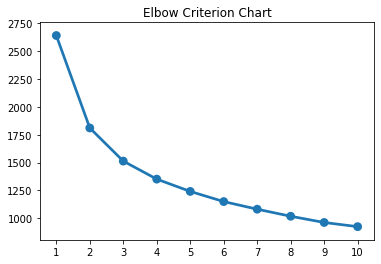

In [45]:
plt.title('Elbow Criterion Chart')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Visualize and interpret segmentation solutions

In [47]:
kmeans4_averages=wholesale_kmeans.groupby(['segment']).mean().round(0)
kmeans4_averages

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
segment,,,,,,
0,3618.0,6645.0,11296.0,703.0,4675.0,576.0
1,10453.0,12717.0,17723.0,1940.0,7684.0,2394.0
2,9990.0,1893.0,2465.0,2328.0,429.0,732.0
3,25499.0,5197.0,5080.0,8016.0,839.0,3032.0


It's not clear to interpret averages values since they are different for each variables.

<function matplotlib.pyplot.show(*args, **kw)>

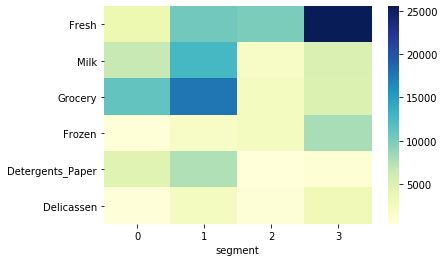

In [48]:
import seaborn as sns
sns.heatmap(kmeans4_averages.T, cmap='YlGnBu')
plt.show

By using NMF;

In [60]:
nmf4_averages=df.groupby(['nmf_results']).mean().round(0)
nmf4_averages

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
nmf_results,,,,,,
0,18742.0,3263.0,4063.0,3086.0,868.0,1311.0
1,5043.0,8853.0,15392.0,1326.0,6802.0,1391.0
2,4070.0,11893.0,6681.0,1918.0,2049.0,2520.0
3,7288.0,3516.0,3566.0,9959.0,522.0,2296.0


<function matplotlib.pyplot.show(*args, **kw)>

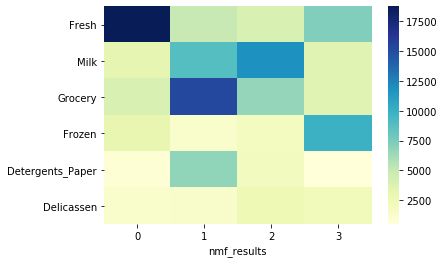

In [61]:
import seaborn as sns
sns.heatmap(nmf4_averages.T, cmap='YlGnBu')
plt.show

### There are some differences
- Segment 0 is heavy fresh product buyer
- Segment 1 buy mostly groceries, milk and detergent and papers
- Segmet 2 is also heavy on milk and groceries, but buys more milk and less groceries than segment 1.
- Finally, segment 3 buys mostly frozens and fresh products.